In [1]:
import numpy as np
import changefinder
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from IPython.core.display import display
%matplotlib inline

# ChangeFinder

## SDAR

In [2]:
df_n = pd.read_csv("/Users/satetsu/program/python/DL/finance/data/1d/nikkei225_d.csv")
df_uj = pd.read_csv("/Users/satetsu/program/python/DL/finance/data/1d/usdjpy_d.csv")
display(df_n.describe())
display(df_uj.describe())
display(df_n.tail())
display(df_uj.tail())

,Open,High,Low,Close
count,7713.000000,7713.000000,7713.000000,7713.000000
mean,16886.807608,17003.495597,16762.519927,16882.682240
std,6258.118740,6285.615284,6227.294515,6257.589647
min,7059.770000,7100.770000,6994.900000,7054.980000
25%,11578.020000,11653.260000,11510.180000,11579.270000
50%,16464.240000,16600.200000,16331.370000,16461.730000
75%,19931.890000,20052.110000,19823.860000,19924.890000
max,38921.650000,38957.440000,38827.710000,38915.870000


,Open,High,Low,Close
count,4351.000000,4351.000000,4351.000000,4351.000000
mean,106.052372,106.517146,105.540359,106.047786
std,14.340136,14.373242,14.303096,14.338144
min,75.750000,76.000000,75.570000,75.820000
25%,96.602500,97.395000,95.791500,96.642500
50%,108.860000,109.405000,108.380000,108.860000
75%,117.873000,118.373500,117.415000,117.870000
max,134.990000,134.990000,134.280000,134.870000


,Date,Open,High,Low,Close
7708,2016/12/26,19394.41,19432.48,19385.94,19396.64
7709,2016/12/27,19353.43,19478.58,19352.06,19403.06
7710,2016/12/28,19392.11,19442.13,19364.73,19401.72
7711,2016/12/29,19301.04,19301.04,19092.22,19145.14
7712,2016/12/30,18997.68,19176.81,18991.59,19114.37


,Date,Open,High,Low,Close
4346,2017-09-28,112.810,113.200,112.256,112.314
4347,2017-09-29,112.315,112.727,112.220,112.508
4348,2017-10-02,112.517,113.056,112.510,112.723
4349,2017-10-03,112.723,113.196,112.665,112.891
4350,2017-10-04,112.888,112.938,112.326,112.789


In [3]:
df_n.columns = ["Date", "n_Open", "n_High", "n_Low", "n_Close"]
df_uj.columns = ["Date", "uj_Open", "uj_High", "uj_Low", "uj_Close"]
df_uj.Date = [i.replace("-", "/") for i in df_uj.Date]

In [4]:
# dfの結合
df = df_n.merge(df_uj,how="left")
display(df.head())
# 欠損部を破棄
df = df.dropna()
display(df.head())

,Date,n_Open,n_High,n_Low,n_Close,uj_Open,uj_High,uj_Low,uj_Close
0,1986/01/04,13118.50,13142.33,13105.97,13136.87,NaN,NaN,NaN,NaN
1,1986/01/06,13129.05,13145.54,13053.22,13053.79,NaN,NaN,NaN,NaN
2,1986/01/07,13034.57,13037.68,12933.50,12991.24,NaN,NaN,NaN,NaN
3,1986/01/08,12997.74,13057.46,12996.80,13056.42,NaN,NaN,NaN,NaN
4,1986/01/09,13036.08,13062.26,12959.21,13034.19,NaN,NaN,NaN,NaN


,Date,n_Open,n_High,n_Low,n_Close,uj_Open,uj_High,uj_Low,uj_Close
3788,2001/01/04,13898.09,13990.57,13667.68,13691.49,113.57,115.75,113.52,115.68
3789,2001/01/05,13763.22,13947.06,13725.46,13867.61,115.62,116.88,115.47,116.54
3790,2001/01/09,13732.85,13732.85,13460.82,13610.51,115.92,116.85,115.60,116.78
3791,2001/01/10,13593.16,13593.16,13349.15,13432.65,116.80,117.14,115.74,116.44
3792,2001/01/11,13433.09,13436.61,13123.81,13201.07,116.50,117.75,116.25,117.69


In [5]:
data_n = df.n_Close
data_n = np.array(data_n)
data_uj = df.uj_Close
data_uj = np.array(data_uj)

In [6]:
# 終値の変化点検出
cf = changefinder.ChangeFinder(r=0.01, order=1, smooth=7)

ret_n = []
for i in data_n:
    score = cf.update(i)
    ret_n.append(score)

ret_uj = []
for i in data_uj:
    score = cf.update(i)
    ret_uj.append(score)

ret_n = np.array(ret_n)
ret_uj = np.array(ret_uj)  

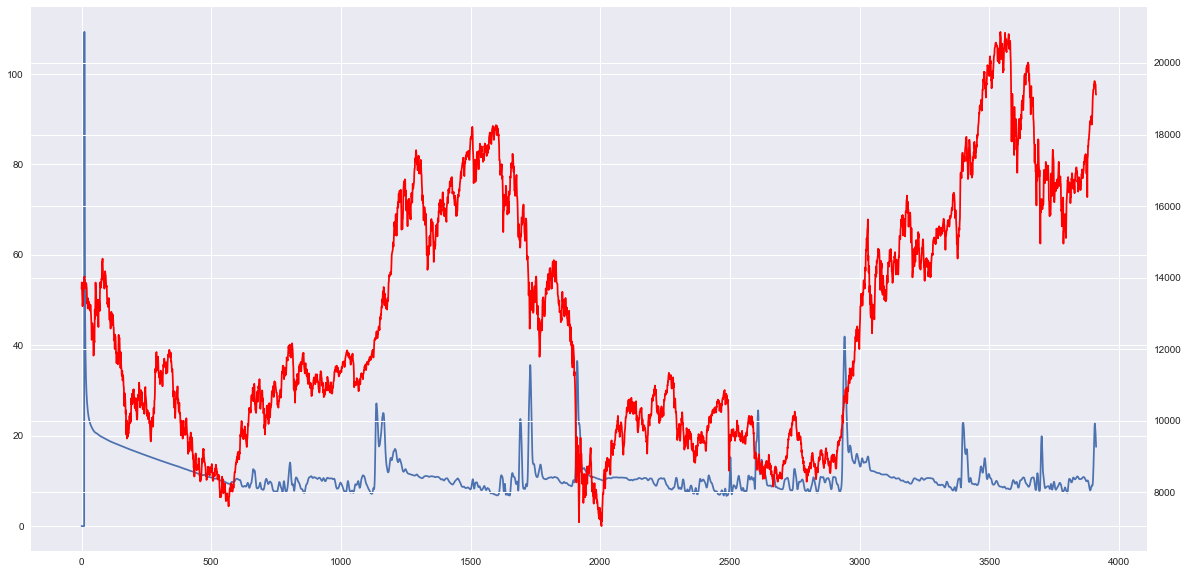

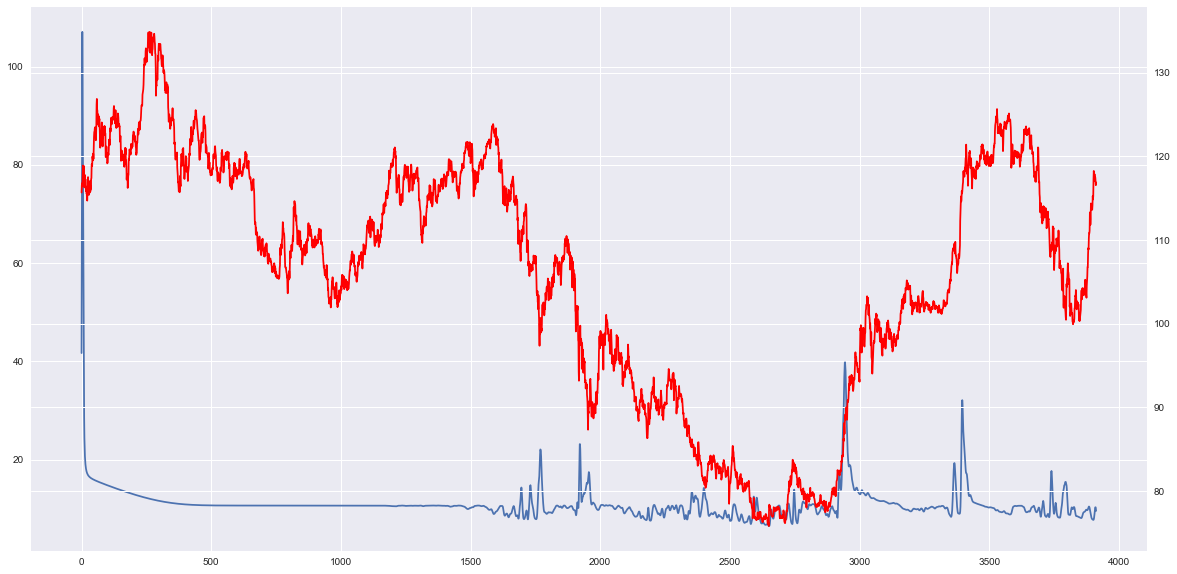

In [7]:
# data_n: ret_n, data_uj: ret_uj
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(ret_n)
ax2 = ax.twinx()
ax2.plot(data_n,'r')
plt.show()

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(ret_uj)
ax2 = ax.twinx()
ax2.plot(data_uj,'r')
plt.show()

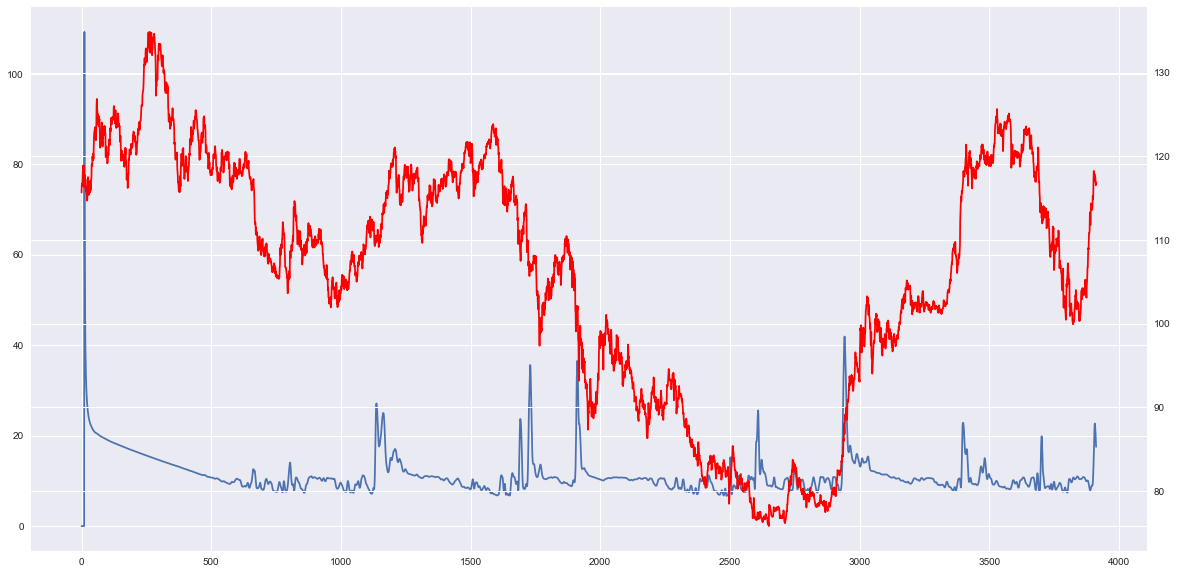

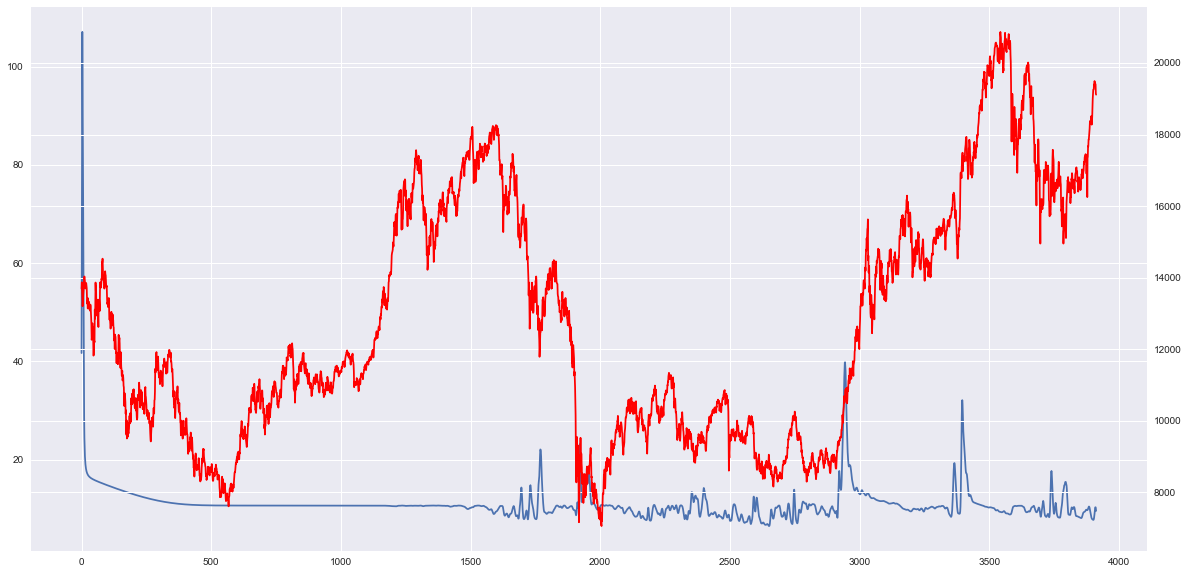

In [8]:
# data_uj: ret_n, data_n: ret_uj
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(ret_n)
ax2 = ax.twinx()
ax2.plot(data_uj,'r')
plt.show()

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(ret_uj)
ax2 = ax.twinx()
ax2.plot(data_n,'r')
plt.show()

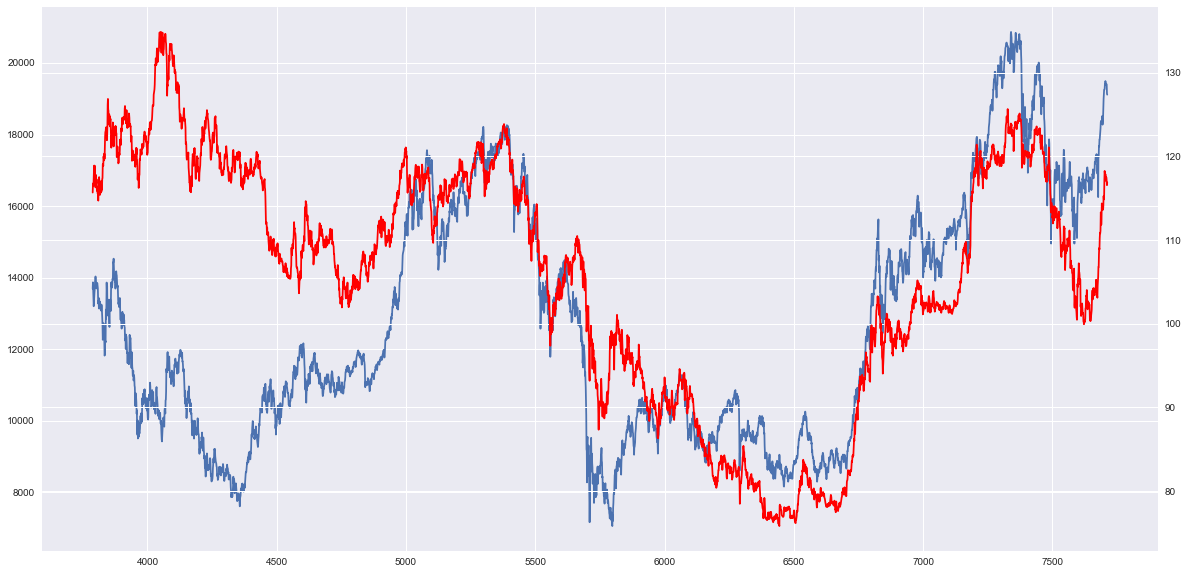

In [9]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(df.n_Close)
ax2 = ax.twinx()
ax2.plot(df.uj_Close,'r')
plt.show()

In [10]:
ret_uj[1000:].max()
print(ret_uj[1000:].argmax())
print(ret_n[1000:].argmax())

1944
1942


In [11]:
display(df.iloc[1992:1995])

,Date,n_Open,n_High,n_Low,n_Close,uj_Open,uj_High,uj_Low,uj_Close
5785,2009/02/19,7604.22,7642.69,7537.56,7557.65,93.64,94.45,93.30,94.06
5786,2009/02/20,7544.07,7554.70,7382.33,7416.38,94.07,94.36,92.54,93.31
5787,2009/02/23,7314.30,7417.18,7209.43,7376.16,93.50,94.94,92.77,94.37
